In [181]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import io
import pandas as pd
from IPython.display import HTML as html_print

In [182]:
dates_index = []
data_size = 15
companies = ['AAPL', 'AMZN', 'FB', 'GOOG', 'TSLA']
dates = []
prices = []
current_price = []
change_price = []
scores = []

for i in range(0, data_size):
    dates_index.append(i)

In [183]:
class Stocks:
    
    dates = []
    prices = []
    ticker = ''
    
    def csv_to_arrays(self, ticker):
        df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + ticker + '&apikey=U3B8JD1PC1LRJ7ZD&datatype=csv')
        # print(df.head())
        # print(df.values)
        # print(len(df.index))

        for i in range(0, data_size):
            # len(df.index)
            self.dates.append(df.iloc[i][0])
            self.prices.append(df.iloc[i][1])    
            # print(dates[i])
            # print(prices[i])
            
            
    def predictor(self, dates, prices, dates_index, data_size, ticker):
        # consider adding C=1e3 (default 1)
        # smaller C encourages larger margin, and resultantly simpler decision
        # larger C encourages smaller margin, and better at classifying points
        # consider adding gamme='scale' (default auto -> 1/n)
        # smaller gamma constrains cannot capture complexity of shape (whole training set)
        # larger gamma results in only including vector itself

        dates_index = np.reshape(dates_index, (data_size, 1))

        lin = SVR(kernel='linear', C=1e5)
        poly2 = SVR(kernel='poly', degree=2, C=1e3)
        poly3 = SVR(kernel='poly', degree=3)
        poly4 = SVR(kernel='poly', C=1e-2, degree=4)
        rbf = SVR(kernel='rbf', C=1e4)

        lin.fit(dates_index, prices)
        poly2.fit(dates_index, prices)
        poly3.fit(dates_index, prices)    
        poly4.fit(dates_index, prices)    
        rbf.fit(dates_index, prices)
        
        scores.append(rbf.score(dates_index, prices, sample_weight=None))
        
        plt.scatter(dates_index, prices)
        plt.plot(dates_index, lin.predict(dates_index), color = 'yellow', label = 'Linear')
        plt.plot(dates_index, poly2.predict(dates_index), color = 'green', label = 'Polynomial (2nd Degree)')
        plt.plot(dates_index, poly3.predict(dates_index), color = 'orange', label = 'Polynomial (3rd Degree)')
        plt.plot(dates_index, poly4.predict(dates_index), color = 'purple', label = 'Polynomial (4th Degree)')
        plt.plot(dates_index, rbf.predict(dates_index), color = 'blue', label = 'Radial Basis Function')
        plt.ylabel('Price (USD)')
        plt.xlabel(str(data_size) +' Days ('+ dates[0] + ' to ' + dates[data_size - 1] + ')')
        plt.title(ticker + ' Stocks (Support Vector Regression)')
        plt.legend()
        plt.show()

        # print(dates)

        return lin.predict(data_size)[0], poly2.predict(data_size)[0], poly3.predict(data_size)[0], poly4.predict(data_size)[0], rbf.predict(data_size)[0]
    
    def plus_minus(self, value):
        value = round(value, 2)
        if value > 0:
            print(' (+' + str(value) + ')')
        else:
            print(' (' + str(value) + ')')
            # print colored(value, 'green')

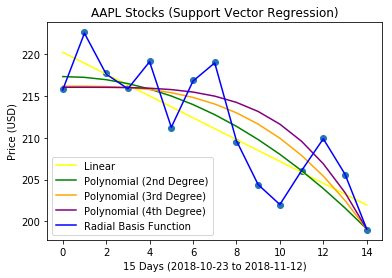

Linear Predicition is: 200.65 (+1.65)
Polynomial (2nd Degree) Predicition is: 196.4 (-2.6)
Polynomial (3rd Degree) Predicition is: 195.18 (-3.82)
Polynomial (4th Degree) Predicition is: 193.72 (-5.28)
Radial Basis Function Predicition is: 207.02 (+8.02)


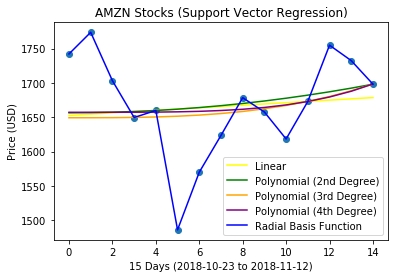

Linear Predicition is: 1680.53 (-17.71)
Polynomial (2nd Degree) Predicition is: 1704.3 (+6.06)
Polynomial (3rd Degree) Predicition is: 1709.61 (+11.37)
Polynomial (4th Degree) Predicition is: 1711.55 (+13.31)
Radial Basis Function Predicition is: 1676.43 (-21.81)


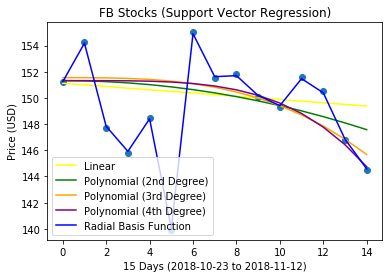

Linear Predicition is: 149.25 (+4.77)
Polynomial (2nd Degree) Predicition is: 147.02 (+2.54)
Polynomial (3rd Degree) Predicition is: 144.33 (-0.15)
Polynomial (4th Degree) Predicition is: 142.65 (-1.83)
Radial Basis Function Predicition is: 147.59 (+3.11)


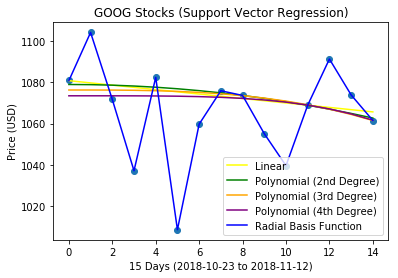

Linear Predicition is: 1064.58 (+3.19)
Polynomial (2nd Degree) Predicition is: 1060.27 (-1.12)
Polynomial (3rd Degree) Predicition is: 1058.09 (-3.3)
Polynomial (4th Degree) Predicition is: 1057.89 (-3.5)
Radial Basis Function Predicition is: 1063.8 (+2.41)


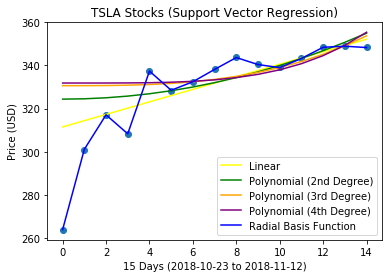

Linear Predicition is: 355.05 (+6.68)
Polynomial (2nd Degree) Predicition is: 359.44 (+11.07)
Polynomial (3rd Degree) Predicition is: 359.01 (+10.64)
Polynomial (4th Degree) Predicition is: 362.83 (+14.46)
Radial Basis Function Predicition is: 334.28 (-14.09)


In [184]:
for i in range(0, (len(companies))):
    s = Stocks()

    s.csv_to_arrays(companies[i])
    s.prices.reverse()
    s.dates.reverse()

    predictor = s.predictor(s.dates, s.prices, dates_index, data_size, companies[i])
    prices = s. prices

    print(('Linear Predicition is: ' + str(round(predictor[0],2))), end='')
    s.plus_minus(predictor[0] - prices[data_size-1])
    print(('Polynomial (2nd Degree) Predicition is: ' + str(round(predictor[1],2))), end='')
    s.plus_minus(predictor[1] - prices[data_size-1])
    print(('Polynomial (3rd Degree) Predicition is: ' + str(round(predictor[2],2))), end='')
    s.plus_minus(predictor[2] - prices[data_size-1])
    print(('Polynomial (4th Degree) Predicition is: ' + str(round(predictor[3],2))), end='')
    s.plus_minus(predictor[3] - prices[data_size-1])
    print(('Radial Basis Function Predicition is: ' + str(round(predictor[4],2))), end='')
    s.plus_minus(predictor[4] - prices[data_size-1])
    
    current_price.append(prices[data_size-1])
    change_price.append(predictor[4] - prices[data_size-1])
    
    
    del s.prices [:]
    del s.dates [:]


In [192]:
print(current_price)
print(scores)
future_price = [change_price + current_price for change_price ,current_price in zip (change_price, current_price)]
print(change_price)

[199.0, 1698.24, 144.48, 1061.39, 348.37]
[0.9998015825482502, 0.9999980858190096, 0.9993508884125483, 0.9999809917900732, 0.9999801841812253]
[8.024420207003459, -21.80538135710617, 3.11412209027327, 2.4054733497193865, -14.09308206131118]


In [193]:
portfolio = [4.0, 10.0, 8.0, 0.0, 2.0]
future_buying_power = 0
future_portfolio = [0.0] * len(portfolio)
future_per_stock = [0.0] * len(portfolio)

In [194]:
def money_in_portfolio(current, port):
    value = 0
    for i in range(0, len(current)):
        value += (current[i] * port[i])
    return value

In [195]:
def percent_change(current_price, change_price):
    percentage_array = []
    for i in range(0, len(current_price)):
        percentage_array.append((change_price[i]/current_price[i]))
    return percentage_array

In [196]:
# scores = [0.99972, 0.999998, 0.9993, 0.99998, 0.99998]
# above is for testing

def score_relative(scores):
    new_scores = [0.0] * len(scores)
    modify_scores = scores[:]
    # mins = min(scores)
    # maxs = max(scores)
    # diff = 1 - (maxs - mins)    
    # print(diff)
    
    # while (min(new_scores) >= 0.85):
        # new_scores = np.asarray(new_scores) 
    for i in range(0, len(scores)):
        max_value = max(modify_scores)
        max_index = modify_scores.index(max_value)
        new_scores[max_index] = max_value - i/10
        modify_scores[max_index] = 0
    
    return new_scores
    
relative_scores = score_relative(scores)
print(relative_scores)

[0.6998015825482502, 0.9999980858190096, 0.5993508884125482, 0.8999809917900732, 0.7999801841812253]


In [197]:
buying_power = money_in_portfolio(current_price, portfolio)
print(buying_power)

percent_price = percent_change(current_price, change_price)
print(percent_price)

19630.980000000003
[0.04032371963318321, -0.012839988080074766, 0.021554001178524847, 0.002266342578806458, -0.04045435043577569]


In [198]:
# stuff = sorted(current_price)
# print(stuff)

def trade_alg(buying_power, current_price, percent_price, relative_scores):
    
    cv = [0.0] * len(current_price) # Array to store which stocks should be bought
    sum_cv = 0
    money_per_stock = [0.0] * len(current_price)
    
    for i in range(0, len(current_price)):
        cv[i] = relative_scores[i] * percent_price[i]
        if (cv[i] < 0):
            cv[i] = 0.0
            
    sum_cv = sum(cv)
    
    for i in range(0, len(current_price)):
        if (cv[i] > 0.0):
            cv[i] /= sum_cv
            money_per_stock[i] = cv[i] * buying_power
        
    # del cv [:]
    # del money_per_stock [:]
    return money_per_stock 
    
    
future_per_stock = trade_alg(buying_power, current_price, percent_price, relative_scores)

# future_portfolio = (future_per_stock / future_price)
future_portfolio = [future_per_stock/current_price for future_per_stock,current_price in zip (future_per_stock, current_price)]

print(future_portfolio)
print (future_price)

future_buying_power = money_in_portfolio(future_price, future_portfolio)
print(buying_power)
print(future_buying_power)
        

[64.47260053265917, 0.0, 40.653138577191974, 0.8737288201020631, 0.0]
[207.02442020700346, 1676.4346186428938, 147.59412209027326, 1063.7954733497195, 334.2769179386888]
19630.980000000003
20277.035806786145


In [199]:
19630
20277

20277